## Supervised Methods

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Processing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score,  roc_curve, roc_auc_score, classification_report
import time

In [2]:
df = pd.read_csv('Data/Pipeline_data_toy_bin.csv', index_col=[0])
#df = pd.read_csv('Data/Pipeline_data_bin.csv', index_col=[0])

df.head()

,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,...,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,birthweight_bin
0,46.3,0.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0,1
1,25.5,0.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,0.0,...,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0,0
2,21.8,0.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,0.0,...,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0,1
3,22.7,0.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,1.0,...,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0,0
4,34.0,3.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0


In [3]:
X = df.drop(['birthweight_bin'], axis=1)
y = df['birthweight_bin']

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
X_pre = X.drop(['birth_time','m_deliveryweight','num_prenatal_visits','time_since_menses','weight_change',
            'mn_prenatalcare_began','gonorrhea','labour_induced','admit_icu','m_transferred','infections',
            'infant_sex','birth_attendant','birth_place','birth_mn','birth_dy','payment','delivery_method'], 
            axis=1)

In [6]:
num_cols = ('bmi','cigs_before_preg','f_age','m_age','m_height_in','prior_births_dead','prior_births_living',
            'prior_terminations','prepreg_weight','num_prev_cesareans')

bin_cols = ('m_morbidity','riskf','prev_cesarean')

cat_cols = ('f_education','f_hispanic','f_race6','m_nativity','m_education','m_hispanic','m_race6','res_status')

In [7]:
num_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('num', num_transformer , num_cols),
            ('cat', cat_transformer , cat_cols)
        ])

In [8]:
X_processed_pre = preprocessor.fit_transform(X_pre)

In [9]:
X_processed_pre = pd.DataFrame(X_processed_pre)

In [10]:
X_processed_pre.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,2.810418,-0.230973,-0.594191,-0.695671,-0.049740,-0.083903,-0.885747,0.643220,2.627516,-0.372296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.250946,-0.230973,-1.754119,-2.253880,0.310014,-0.083903,-0.885747,-0.477463,-0.151832,-0.372296,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.795515,-0.230973,-0.668885,-0.868806,-0.409494,-0.083903,-0.885747,-0.477463,-0.864486,-0.372296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.663052,-0.230973,-0.071061,-0.176268,-0.769248,-0.083903,-0.104459,0.643220,-0.840731,1.332226,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.000092,0.366727,-0.519429,0.343135,-0.409494,-0.083903,-0.104459,0.643220,0.774617,-0.372296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


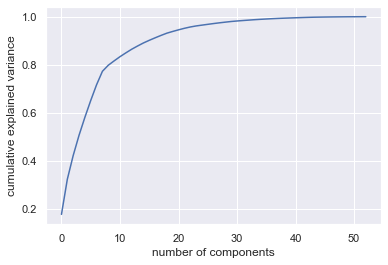

In [11]:
pca = PCA().fit(X_processed_pre)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_processed_pre)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

### Logistic Regression

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.652


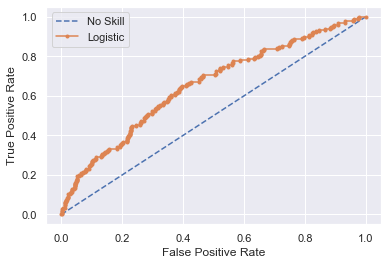

In [16]:
ns_probs = [0 for _ in range(len(y_test))]

# fit a model
logm = LogisticRegression(solver='lbfgs', penalty='none')
logm.fit(X_train, y_train)

# predict probabilities
lr_probs = logm.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [14]:
y_pred = logm.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1823    0]
 [ 177    0]]


In [15]:
lr = LogisticRegression(solver='liblinear')
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')

print('LR Scores: ', lr_scores)

LR Scores:  [0.66911565 0.65396307 0.67474888 0.62880185 0.59762834]


### KNN

In [55]:
clf = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), param_grid={'n_neighbors': range(1, 25)})

clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 25)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [56]:
clf.best_params_

{'n_neighbors': 12}

In [19]:
knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [20]:
y_pred = knn.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1823    0]
 [ 177    0]]


In [26]:
print('Number of low-bw cases in test set =', cm[1,0] + cm[1,1])
print('Number of correctly predicted low-bw cases =', cm[1,1])

Number of low-bw cases in test set = 177
Number of correctly predicted low-bw cases = 11


In [27]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1814, 9, 166, 11)

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.555


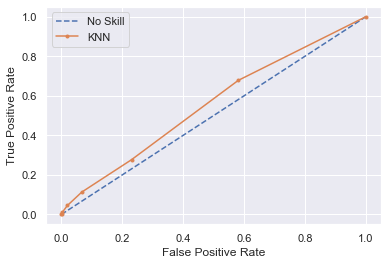

In [21]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
knn_probs = knn.predict_proba(X_test)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### SVM

In [ ]:
clf = GridSearchCV(estimator=SVC(), param_grid={'C': [8, 9, 10], 'gamma': [0.02, 0.03, 0.04]})

clf.fit(X_train, y_train)
clf.best_params_

In [22]:
svm = SVC(gamma=0.03, kernel='rbf', C=10, probability=True)
svm.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
y_pred = svm.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1823    0]
 [ 177    0]]


In [ ]:
print('Number of low-bw cases in test set =', cm[1,0] + cm[1,1])
print('Number of correctly predicted low-bw cases =', cm[1,1])

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.536


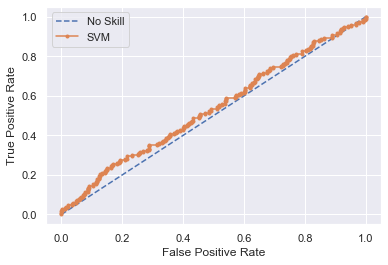

In [24]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
svm_probs = svm.predict_proba(X_test)

# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (svm_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [35]:
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='roc_auc')

print('SVM Scores: ', svm_scores)

KeyboardInterrupt: 

### Linear Discriminant Analysis

In [ ]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_f, y_train_f)

In [ ]:
y_pred = lda.predict(X_test_f)

cm = metrics.confusion_matrix(y_test_f, y_pred_f)
print(cm)

In [ ]:
print('Number of low-bw cases in test set =', cm[1,0] + cm[1,1])
print('Number of correctly predicted low-bw cases =', cm[1,1])

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

### Decision tree

In [ ]:
import graphviz 

# Helper function to plot the decision tree. This uses the graphviz library.
def plot_tree(graph, feature_names=None, class_names=None):
    '''
    This method takes a DecisionTreeClassifier object, along with a list of feature names and target names
    and plots a tree. The feature names and class names can be left empty; they are just there for labelling 
    '''
    dot_data = export_graphviz(graph, out_file=None, 
                      feature_names=feature_names,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True) 
    
    graph = graphviz.Source(dot_data)
    
    return graph

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [28]:
#X = X.drop(['time_since_menses'], axis=1)
# Tree models don't need scaling - not distance based 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [70]:
GS_model = GridSearchCV(DecisionTreeClassifier(random_state=2), 
                        {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}, cv=15,)

GS_model.fit(X_train2, y_train2)
GS_model.best_params_

{'max_depth': 2}

In [29]:
dt = DecisionTreeClassifier(max_depth=2).fit(X_train2, y_train2)
y_pred2 = dt.predict(X_test2)

full_model_accuracy = metrics.accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {full_model_accuracy}')
#plot_tree(dt, X.columns, ['low','normal'])

Accuracy: 0.9115


In [72]:
# 'mean_test_score' returns the average score for each parameter value over the cv fold. 
accuracy_scores = GS_model.cv_results_['mean_test_score']
print(f"Mean accurary scores:{accuracy_scores}")

# Plot the best estimator found: GridSearchCV.best_estimator_ returns the model that performed the best.
best_dt = GS_model.best_estimator_
#plot_tree(best_dt)

Mean accurary scores:[0.91812533 0.9171254  0.91612478 0.91437439 0.91049977 0.90712524
 0.90362469 0.89887453 0.89875086]


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.583


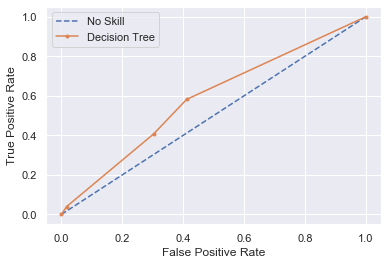

In [30]:
ns_probs = [0 for _ in range(len(y_test2))]

# predict probabilities
dt_probs = dt.predict_proba(X_test2)

# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test2, ns_probs)
dt_auc = roc_auc_score(y_test2, dt_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test2, dt_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [78]:
dt_scores = cross_val_score(dt, X_train2, y_train2, cv=5, scoring='roc_auc')

print('DT Scores: ', dt_scores)

DT Scores:  [0.55630037 0.56482054 0.61986396 0.56970521 0.51863707]


### Random Forest

In [76]:
GS_model = GridSearchCV(RandomForestClassifier(), 
                        {'max_depth':[10, 200, 500, 700, 900, 1000]})

GS_model.fit(X_train2, y_train2)
GS_model.best_params_

{'max_depth': 1000}

In [82]:
rfc = RandomForestClassifier(max_depth=1000)
rfc.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
y_pred2 = rfc.predict(X_test2)

cm = metrics.confusion_matrix(y_test2, y_pred2)
print(cm)

[[1822    1]
 [ 177    0]]


In [ ]:
print('Number of low-bw cases in test set =', cm[1,0] + cm[1,1])
print('Number of correctly predicted low-bw cases =', cm[1,1])

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test2, y_pred2).ravel()
tn, fp, fn, tp

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.631


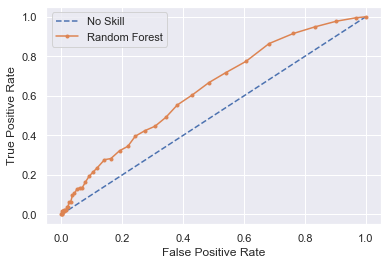

In [83]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rfc_probs = rfc.predict_proba(X_test2)

# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test2, ns_probs)
rfc_auc = roc_auc_score(y_test2, rfc_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test2, rfc_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [86]:
metrics.accuracy_score(y_test2, y_pred2)

0.9115

In [84]:
rf_scores = cross_val_score(rfc, X_train2, y_train2, cv=5, scoring='roc_auc')

print('RF Scores: ', rf_scores)

RF Scores:  [0.59475406 0.61084551 0.60275724 0.58982847 0.60072023]


### Gradient Boosting

In [113]:
lgbm = GridSearchCV(LGBMClassifier(), 
                        {'num_leaves':[2, 5, 10, 30, 50, 70]})

lgbm.fit(X_train2, y_train2)
lgbm.best_params_

C:\Users\catri\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: num_leaves >1 at D:\a\1\s\python-package\compile\src\io\config_auto.cpp, line 304 .


  FitFailedWarning)


{'num_leaves': 5}

In [114]:
gbm = LGBMClassifier(num_leaves=5)
gbm.fit(X_train2, y_train2)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=5, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [115]:
y_pred2 = gbm.predict(X_test2)

cm = metrics.confusion_matrix(y_test2, y_pred2)
print(cm)

[[1822    1]
 [ 177    0]]


No Skill: ROC AUC=0.500
Light Gradient Boost: ROC AUC=0.641


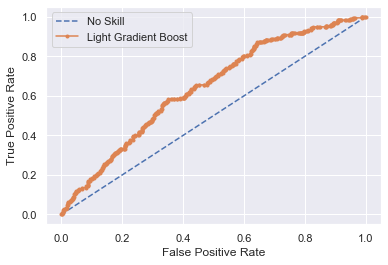

In [112]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
gbm_probs = gbm.predict_proba(X_test2)

# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test2, ns_probs)
gbm_auc = roc_auc_score(y_test2, gbm_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Light Gradient Boost: ROC AUC=%.3f' % (gbm_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(y_test2, gbm_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gbm_fpr, gbm_tpr, marker='.', label='Light Gradient Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [96]:
metrics.accuracy_score(y_test2, y_pred2)

0.9115

In [95]:
lgb_scores = cross_val_score(gbm, X_train2, y_train2, cv=5, scoring='roc_auc')

print('LGB Scores: ', lgb_scores)

LGB Scores:  [0.64491366 0.63936624 0.66015724 0.63091421 0.59306585]


In [97]:
gbm2 = GradientBoostingClassifier()
gbm2.fit(X_train2, y_train2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
y_pred2 = gbm2.predict(X_test2)

cm = metrics.confusion_matrix(y_test2, y_pred2)
print(cm)

[[1819    4]
 [ 177    0]]


No Skill: ROC AUC=0.500
Gradient Boost: ROC AUC=0.641


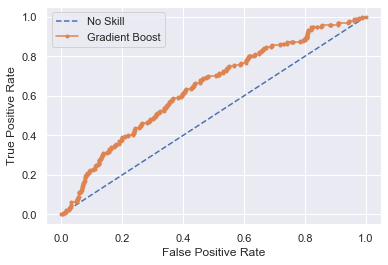

In [99]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
gbm2_probs = gbm2.predict_proba(X_test2)

# keep probabilities for the positive outcome only
gbm2_probs = gbm2_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test2, ns_probs)
gbm2_auc = roc_auc_score(y_test2, gbm2_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boost: ROC AUC=%.3f' % (gbm2_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
gbm2_fpr, gbm2_tpr, _ = roc_curve(y_test2, gbm2_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gbm2_fpr, gbm2_tpr, marker='.', label='Gradient Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [101]:
metrics.accuracy_score(y_test2, y_pred2)

0.9095

In [100]:
gb_scores = cross_val_score(gbm2, X_train2, y_train2, cv=5, scoring='roc_auc')

print('GB Scores: ', gb_scores)

GB Scores:  [0.62506803 0.61568081 0.65276789 0.60041624 0.57236839]


### Pipeline from Kaggle

In [103]:
start = time.time()
for model in [
    LogisticRegression, 
    SGDClassifier,
    DecisionTreeClassifier, 
    KNeighborsClassifier,
    GaussianNB, 
    QuadraticDiscriminantAnalysis,
    # SVC, # Takes a long time
    RandomForestClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier, 
    GradientBoostingClassifier,
    XGBClassifier,
    LGBMClassifier
]:
    cls = model()
    kfold = model_selection.KFold(n_splits=10)
    start_t = time.time()
    s = model_selection.cross_val_score(cls, X_train, y_train, 
                                        scoring='roc_auc', cv=kfold, n_jobs=-1)
    training_time = time.time() - start_t 
    print("{:32}  AUC:{:.3f} STD: {:.2f} Time: {:.2f}".format(model.__name__, 
                                                              s.mean(), 
                                                              s.std(), 
                                                              training_time))

LogisticRegression                AUC:0.643 STD: 0.04 Time: 6.95
SGDClassifier                     AUC:0.552 STD: 0.03 Time: 0.88
DecisionTreeClassifier            AUC:0.523 STD: 0.02 Time: 4.47
KNeighborsClassifier              AUC:0.527 STD: 0.03 Time: 3.40
GaussianNB                        AUC:0.626 STD: 0.04 Time: 0.15
QuadraticDiscriminantAnalysis     AUC:0.624 STD: 0.04 Time: 0.24
RandomForestClassifier            AUC:0.624 STD: 0.02 Time: 41.49
AdaBoostClassifier                AUC:0.608 STD: 0.03 Time: 11.93
ExtraTreesClassifier              AUC:0.597 STD: 0.04 Time: 11.48
GradientBoostingClassifier        AUC:0.623 STD: 0.05 Time: 62.90
XGBClassifier                     AUC:0.578 STD: 0.02 Time: 39.08
LGBMClassifier                    AUC:0.613 STD: 0.03 Time: 7.18


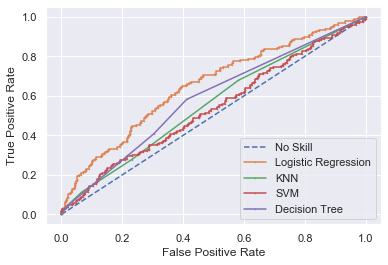

In [32]:
# Plot all roc curves above on one graph

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression', markersize=1)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN', markersize=1)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM', markersize=1)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree', markersize=1)
#plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest', markersize=1)
#plt.plot(gbm2_fpr, gbm2_tpr, marker='.', label='Gradient Boost', markersize=1)
#plt.plot(gbm_fpr, gbm_tpr, marker='.', label='Light Gradient Boost', markersize=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.show()
plt.savefig('Results/ROC_curves_prepreg')